## 1.Generate moon data and show class boundary for Naive Bayes, Logistic and SVM with RBF.

In [29]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [20]:
X, Y = make_moons(n_samples=200,random_state=10)  #load make_moon data set with 200 samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)#split as train and test data


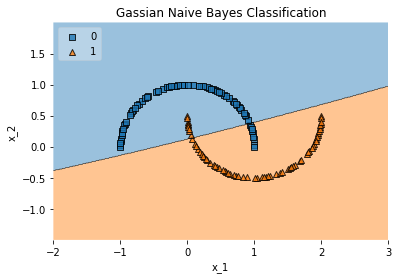

In [26]:
#Naive Bayes Classification with GaussianNB
clf = GaussianNB()                     #initialize the model
clf.fit(X_train,Y_train)               #fit the model

#ploting decision boundary
plot_decision_regions(X_train, Y_train, clf=clf, legend=2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Gassian Naive Bayes Classification')
plt.show()

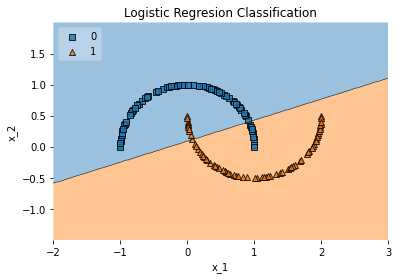

In [27]:
#Logistic Regression
clf = LogisticRegression(random_state=1)             #initialize the model
clf.fit(X_train, Y_train)                            #fit the model

#ploting decision boundary
plot_decision_regions(X_train, Y_train, clf=clf, legend=2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Logistic Regresion Classification')
plt.show()

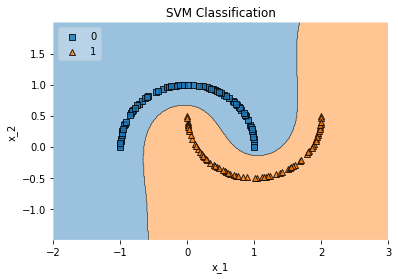

In [30]:
#SVM classification

clf = SVC(kernel='rbf')                    #initialise the model
clf.fit(X_train, Y_train)                  #fit the model

#plot decision boundary
plot_decision_regions(X_train, Y_train, clf=clf, legend=2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('SVM Classification')
plt.show()

## 2. Time series forecasting using regression: 
For given time data, use the regression method to predict the next value.


In [356]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#import module for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

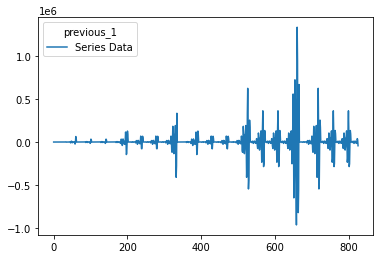

In [382]:
#load the data from the 'time_data.csv' file
time_data = pd.read_csv('time_data.csv')
data.plot()

In [388]:
df=time_data.copy()
time_data.head(10)

,Series Data
0,0.427064
1,-0.412228
2,-0.167601
3,0.026181
4,-0.253358
5,0.042899
6,0.280868
7,0.021882
8,0.431950
9,-0.352888


In [384]:
#define a function for feature selection
def featureSelection(data, p):
    features=data
    for i in range(1, p+1):
        features['pervious_%d'%i] = features.iloc[:,0].shift(i)
    return features
    

In [385]:
p_values = np.array([i for i in range(1,20)])

for p  in p_values:
    train_data = featureSelection(df, p)
    train_data = train_data.iloc[p:,:]
    X = train_data.iloc[:, 1:]
    y = train_data.iloc[:,0]
    model = LinearRegression()
    kf = KFold(n_splits=10,shuffle=True,random_state=2)
    scores = cross_val_score(model, X, y, cv=kf,scoring='neg_mean_squared_error')
    print("RMSE with p=%d is = %0.2f"%(p, np.sqrt(abs(scores.mean()))))


RMSE with p=1 is = 123126.98
RMSE with p=2 is = 76551.76
RMSE with p=3 is = 74134.16
RMSE with p=4 is = 76099.90
RMSE with p=5 is = 68368.71
RMSE with p=6 is = 68743.00
RMSE with p=7 is = 71659.17
RMSE with p=8 is = 65671.25
RMSE with p=9 is = 69278.63
RMSE with p=10 is = 70897.49
RMSE with p=11 is = 72092.66
RMSE with p=12 is = 69752.19
RMSE with p=13 is = 71955.21
RMSE with p=14 is = 71470.11
RMSE with p=15 is = 74819.79
RMSE with p=16 is = 75220.55
RMSE with p=17 is = 79018.00
RMSE with p=18 is = 73266.20
RMSE with p=19 is = 75970.73


In [386]:
p=8
df =time_data.copy()
train_data = featureSelection(df, p)
train_data = train_data.iloc[p:,:]
X = train_data.iloc[:, 1:]
y = train_data.iloc[:,0]
#print(X.info)
model= LinearRegression()
model.fit(X,y)
mean_squared_error(y, model.predict(X))


3596250348.605097

In [387]:
X.tail(3)

,pervious_1,pervious_2,pervious_3,pervious_4,pervious_5,pervious_6,pervious_7,pervious_8
823,4070.756557,-15392.103450,-6628.990764,-8629.358210,6718.791842,10645.222670,8837.817455,-8033.552975
824,39373.423070,4070.756557,-15392.103450,-6628.990764,-8629.358210,6718.791842,10645.222670,8837.817455
825,24871.315750,39373.423070,4070.756557,-15392.103450,-6628.990764,-8629.358210,6718.791842,10645.222670


In [375]:
X_new = np.array([24871.31575,39373.42307,4070.756557,-15392.10345,-6628.990764,-8629.35821,6718.791842,10645.22267])
model.predict(X_new.reshape(1,-1))

array([-24679.57276308])

In [379]:
X_1=np.array([39373.423070,4070.756557,-15392.103450,-6628.990764,-8629.358210,6718.791842,10645.222670,8837.817455])
model.predict(X_1.reshape(1,-1))

array([16156.75026776])